In [13]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets 
  
# metadata 
print(glass_identification.metadata) 
  
# variable information 
print(glass_identification.variables) 


{'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, In

In [14]:
import pandas as pd
import numpy as np
# convert y to vector of 0s and 1s of length 7 so that if y is 1 then the vector is [1, 0, 0, 0, 0, 0, 0]
# if y is 2 then the vector is [0, 1, 0, 0, 0, 0, 0]
# and so on
y_dummies = np.zeros((214, 7))
npy = y.to_numpy()
for i in range(214):
    y_dummies[i, npy[i]-1] = 1

In [15]:
X.count()

RI    214
Na    214
Mg    214
Al    214
Si    214
K     214
Ca    214
Ba    214
Fe    214
dtype: int64

In [16]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [17]:
y.value_counts()

Type_of_glass
2                76
1                70
7                29
3                17
5                13
6                 9
Name: count, dtype: int64

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9]),
    keras.layers.Dense(782, activation="selu", kernel_initializer="he_normal"),
    keras.layers.Dense(356, activation="selu", kernel_initializer="he_normal"),
    keras.layers.Dense(128, activation="selu", kernel_initializer="he_normal"),
    keras.layers.Dense(64, activation="selu", kernel_initializer="he_uniform"),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(32, activation="relu", kernel_initializer="he_uniform"),
    keras.layers.Dense(32, activation="relu", kernel_initializer="random_uniform"),
    keras.layers.Dense(10, activation="relu", kernel_initializer="random_uniform"),
    keras.layers.Dense(7, activation="softmax")
])

In [21]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['accuracy'])

C:\Users\301212298\AppData\Local\pypoetry\Cache\virtualenvs\comp258-FNsmQjYB-py3.10\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [23]:
# shuffle X and y
shuffle_index = np.random.permutation(214)
npX = X.to_numpy()
npy = y_dummies
npX, npy = npX[shuffle_index], npy[shuffle_index]

In [24]:
X_train, X_valid, X_test = npX[:150], npX[150:180], npX[180:]
y_train, y_valid, y_test = npy[:150], npy[150:180], npy[180:]

In [25]:
y_valid

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
 

In [26]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_valid, y_valid))

Epoch 1/500
5/5 [==============================] - 1s 74ms/step - loss: 1.8693 - accuracy: 0.0000e+00 - val_loss: 1.8999 - val_accuracy: 0.3000
Epoch 2/500
5/5 [==============================] - 0s 25ms/step - loss: 1.8053 - accuracy: 0.3467 - val_loss: 1.8750 - val_accuracy: 0.2000
Epoch 3/500
5/5 [==============================] - 0s 26ms/step - loss: 1.7589 - accuracy: 0.3667 - val_loss: 1.8589 - val_accuracy: 0.2667
Epoch 4/500
5/5 [==============================] - 0s 25ms/step - loss: 1.7204 - accuracy: 0.3667 - val_loss: 1.8554 - val_accuracy: 0.2667
Epoch 5/500
5/5 [==============================] - 0s 22ms/step - loss: 1.6969 - accuracy: 0.3667 - val_loss: 1.8491 - val_accuracy: 0.2667
Epoch 6/500
5/5 [==============================] - 0s 20ms/step - loss: 1.6836 - accuracy: 0.3667 - val_loss: 1.8338 - val_accuracy: 0.2667
Epoch 7/500
5/5 [==============================] - 0s 18ms/step - loss: 1.6716 - accuracy: 0.3667 - val_loss: 1.8318 - val_accuracy: 0.2667
Epoch 8/500
5/5 

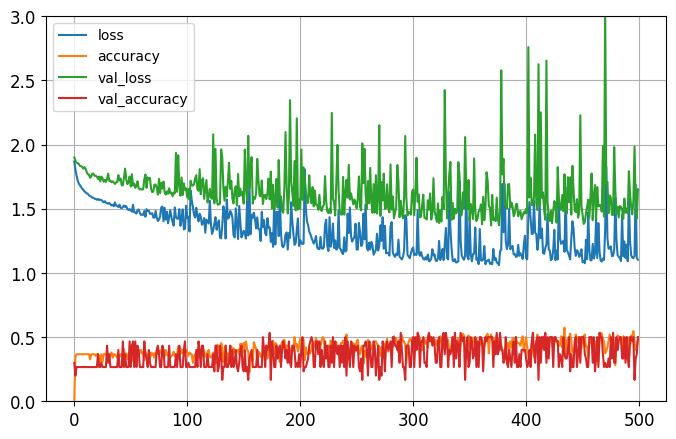

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 3)
plt.show()